# Modelo SIS

El modelo SIS considera 2 posibles estados, susceptibles (S) e infectados (I). Las variaciones entre los estados vienen dadas por los nuevos contagios y los individuos que se recuperan de la enfermedad. Adicionalmente, cada estado se ve afectado por los parámetros que describen la natalidad/mortalidad y/o la muerte a causa de la enfermedad. 

Los diferentes estados del modelo se pueden apreciar en el siguiente diagrama:

![](https://github.com/Grupo-de-simulacion-con-automatas/CAsimulations-Modelacion-de-dinamicas-topologicas-en-la-propagacion-de-una-enfermedad-usando-CA/blob/master/Imagenes/SIS_compartimientos.PNG)

Trabajaremos sobre una población de tamaño constante y normalizado, por lo que $S(t) + I(t) = 1$ y en consecuencia $S'(t) + I'(t) = 0$.

Normalmente, cuando se habla de modelos epidemiológicos con muerte por enfermedad, se consideran 4 parámetros: 

- La **tasa de infección $\beta$**, que representa la probabilidad que tiene un individuo susceptible de adquirir la enfermedad luego de tener contacto con un infectado.
- La **tasa de recuperación $\alpha$**, que podemos entender como la probabilidad de que un infectado se recupere de la enfermedad. En ocasiones representa el tiempo medio que tarda un infectado en recuperarse de la enfermedad [1].
- La **tasa de natalidad/mortalidad $\mu$**, que en el caso de los modelos tradicionales se supone que son iguales. La natalidad nos indica la cantidad de individuos que ingresan al espacio y la mortalidad representa los individuos que fallecen por causas ajenas a la enfermedad.
- La **tasa de muerte por enfermedad $\theta$**, que nos indica la probabilidad que tiene un infectado de fallecer a causa de la enfermedad.

Podemos describir el modelo a partir de un sistema de ecuaciones diferenciales como sigue:

\begin{equation}
\left\{
\begin{array}{l}
S' = \mu(1 - S) + (1 - \theta)\alpha I - \beta S I, \\
I' = \beta S I - (1 - \theta)\alpha I - \mu I.
\end{array}
\right.
\end{equation}

Para determinar los escenarios bajo los cuales una enfermedad es endémica, debemos calcular el valor de $\mathcal{R}_0$ para nuestro sistema de ecuaciones diferenciales. Recuerde que para determinar el valor de $\mathcal{R}_0$ se considera una población completamente susceptible, es decir, $S=1$.

Observe que los nuevos infectados vienen dados por el término $\beta S$, con lo cual definimos $b(t) = \beta S = \beta$. Por otro lado, los flujos que determinan la salida del estado de infección de los individuos están dados por los términos $-\alpha(1-\theta)I-\mu I$, de modo que si llamamos $I(t)$ a la cantidad de individuos infectados que permanecieron infectados desde el momento $t=0$, tenemos

\begin{equation}
\frac{dI}{dt} = -\alpha(1-\theta)I-\mu I.
\end{equation}

Si usamos el método de separación de variables obtenemos

\begin{equation}
I(t) = I(0)e^{-(\alpha(1-\theta)+\mu)t}.
\end{equation}

De ese modo, podemos afirmar que la proporción de individuos que permanecen infectados hasta un tiempo $t$ viene dado por $e^{-(\alpha(1-\theta)+\mu)t}$, con lo cual $F(t)=e^{-(\alpha(1-\theta)+\mu)t}$. Finalmente,

\begin{align*}
\mathcal{R}_0 &= \lim_{T\to\infty}\int_0^T b(t)F(t) dt \\
&= \lim_{T\to\infty}\int_0^T \beta e^{-(\alpha(1-\theta)+\mu)t} dt\\
&= \frac{\beta}{\alpha(1-\theta)+\mu}.
\end{align*}

Donde $b(t)$ representa la cantidad promedio de nuevos contagios que producirá un individuo infectado durante un tiempo $t$ y $F(t)$, conocida como la función de supervivencia, representa la probabilidad de que un individuo recién infectado se mantenga en ese estado durante al menos un tiempo [3,4].

Una vez calculado el valor de $\mathcal{R}_0$, podemos reemplazar sobre la derivada para la población infectada de la ecuación del modelo SIS, con lo cual

\begin{align*}
    \frac{dI}{dt} &= \beta SI - \alpha(1-\theta)I - \mu I \\
    &= \left(S-\frac{1}{\mathcal{R}_0}\right)\beta I \\
    &< \left(1-\frac{1}{\mathcal{R}_0}\right)\beta I, \\
\end{align*}

de donde podemos afirmar que si $\mathcal{R}_0>1$, la derivada $I'$ será positiva, lo cual significa que la enfermedad será endémica. En el caso $\mathcal{R}_0<1$ nos encontraremos con una derivada negativa, por lo que la cantidad de infectados terminará desapareciendo, lo cual implica que la enfermedad no será endémica.

#### Análisis de estabilidad

Para analizar la estabilidad de nuestro modelo SIS debemos conocer sus puntos de equilibrio. Al anular ambas derivadas nos damos cuenta de que están dados por:

$$\begin{array}{ccc}
    P_0=(S_a,I_a)=(1,0) & \text{y} & P_1=(S_b,I_b)=\left(\frac{\alpha(1-\theta)+\mu}{\beta},\frac{\beta-\alpha(1-\theta)-\mu}{\beta}\right).
\end{array}$$

Veamos que los puntos de equilibrio pertenecen al conjunto de posibles soluciones de nuestro sistema, es decir, veamos que satisfacen las condiciones de tener coordenadas positivas y menores o iguales a 1:

En el caso de $P_0$ la verificación es trivial. Por otro lado, si asumimos que $\mathcal{R}_0>1$, para el caso de $P_1$ observe que 

$$0\leq\alpha(1-\theta)+\mu\leq\beta \longrightarrow \frac{\alpha(1-\theta)+\mu}{\beta}\text{, }\frac{\beta+\alpha(1-\theta)+\mu}{\beta}\geq0.$$

Si dividimos la expresión del lado izquierdo por $\beta$ obtenemos:

$$0\leq \frac{\alpha(1-\theta)+\mu}{\beta}\leq1,$$

de donde podemos afirmar que 

$$1-\frac{\alpha(1-\theta)+\mu}{\beta}\leq1 \longrightarrow \frac{\beta-\alpha(1-\theta)-\mu}{\beta}\leq1.$$

De ese modo podemos concluir que ambos puntos de equilibrio cumplen las condiciones de tener coordenadas positivas y menores que la unidad.

Es momento de determinar los comportamientos que describen ambos puntos, $P_0$ y $P_1$. Para esto, considere el jacobiano de la parte lineal del sistema que describe a nuestro modelo SIS dado por:

$$|A-\lambda I|=
\left|\begin{array}{cc}
-\mu-\lambda & \alpha(1-\theta) \\
0 & -\alpha(1-\theta)-\mu-\lambda
\end{array}\right|.$$

De donde se obtienen los valores propios $\lambda_0 = -\mu$ y $\lambda_1 = -\alpha(1-\theta)-\mu$. Dado que $\mu$ representa la tasa de natalidad, $\alpha$ es la tasa de recuperación y $\theta$ es la probabilidad de morir a causa de la enfermedad, no puede ocurrir que $\mu,\alpha,\theta\leq0$, por lo que podemos afirmar que ambos puntos de equilibrio son hiperbólicos y, por otra parte, como claramente nuestro sistema es $C^1$, podemos aplicar el teorema de Hartman-Grobman [2], el cual nos garantiza que el sistema es conjugado topológicamente a su parte lineal en una vecindad abierta de cada uno de los puntos de equilibrio y de ese modo, concluimos que el sistema se comporta como un sumidero cerca de los puntos $P_0$ y $P_1$, concluyendo así la estabilidad de nuestro modelo en dichas vecindades.

#### Estudio numérico

De manera general, dadas unas condiciones iniciales $S(0)=S_0,I(0)=I_0$ aplicamos el método de Euler a partir de la siguiente expresión:

$$\left\{\begin{array}{l}
S_{t+1} = S_t + h\cdot(\mu(1 - S_t) + (1 - \theta)\alpha I_t - \beta S_t I_t )\text{, y} \\
I_{t+1} = I_t + h\cdot(\beta S_t I_t - (1 - \theta)\alpha I_t - \mu I_t).
\end{array}\right.$$

A continuación definiremos a las funciones que describen las derivadas de nuestro modelo y luego las guardamos en una lista, como se muestra a continuación:

In [1]:
# Parámetros del modelo:
alpha =  0.2 # Tasa de recuperación (días que dura en promedio la enfermedad)
mu = 1/(75*365) # Tasa de natalidad / mortalidad
theta = 0.4 # 0.1 # Tasa de muerte por enfermedad
# beta = -alpha*(1-theta)-mu # Tasa de contagio
beta = 0.5

def S_function(values, beta = beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return mu*(1 - S) + (1 - theta)*alpha*I - beta*S*I

def I_function(values, alpha = alpha, beta = beta, mu = mu, theta = theta):
    S = values[0]; I = values[1]
    return beta*S*I - (1 - theta)*alpha*I - mu*I

listOfFunctions = [S_function, I_function]

Si ahora suponemos que tenemos el caso de una enfermedad cuyos parámetros están dados por $\alpha=0.2$, $\beta=0.5$, $\theta=0.4$ y $\mu=\frac{1}{75\cdot365}$, obtendremos una gráfica como la de la siguiente figura para las condiciones iniciales $S_0=0.9$ e $I_0=0.1$:

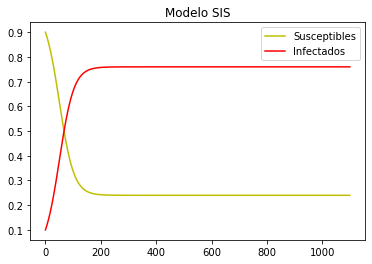

In [2]:
# Condiciones iniciales:
initialValues = [0.9, 0.1]  # S_0 = 0.9; I_0 = 0.1

# Se carga el módulo de la librería CAsimulations para modelos compartimentales en EDOs
from CAsimulation import CompartmentalModelsInEDOS as ca

# Solución discreta del modelo
discreteSolutions = ca.CompartmentalModelsInEDOS(listOfFunctions, initialValues)
discreteSolutions.n_iterations(1100)
discreteSolutions.titlePlot = "Modelo SIS"
discreteSolutions.plotSolutions(["Susceptibles", "Infectados"],["y","r"])

## Referencias

[1] D. de Pereda Sebastián. Modelización matemática de la difusión de una epidemia de peste porcina entre granjas. Master’s thesis, Universidad Complutense de Madrid, 2010.

[2] A. H. Plaza. El teorema de hartman-grobman. Master’s thesis, Universidad de Sevilla, 2020.

[3] J. Heesterbeek and K. Dietz. The concept of R0 in epidemic theory. Statistica Neerlandica, 1996

[4] R. J. Heffernan, J.M.and Smith and L. M. Wahl. Perspectives on the basic reproductive
ratio. The Royal Society, 2005